<a href="https://colab.research.google.com/github/Amik-Sen-Fun/Amik-Sen-Fun/blob/main/Working_With_Images_and_Logistics_Regression_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Working with Images

In this tutorial, we'll use our existing knowledge of PyTorch and linear regression to solve a very different kind of problem: *image classification*. We'll use the famous [*MNIST Handwritten Digits Database*](http://yann.lecun.com/exdb/mnist/) as our training dataset. It consists of 28px by 28px grayscale images of handwritten digits (0 to 9) and labels for each image indicating which digit it represents. Here are some sample images from the dataset:

![mnist-sample](https://i.imgur.com/CAYnuo1.jpg)

In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
# Insights about the dataset
print(len(dataset))

# We can create the test dataset using the MNIST class by passing train=False to the constructor.
test_dataset = MNIST(root='data/', train=False)
print(len(test_dataset))

#Let's look at a sample element from the training dataset.
dataset[0]

60000
10000


(<PIL.Image.Image image mode=L size=28x28 at 0x7F78229B0750>, 5)

Each data is a pair, consisting of a 28x28px image and a label. The image is an object of the class `PIL.Image.Image`, which is a part of the Python imaging library [Pillow](https://pillow.readthedocs.io/en/stable/). We can view the image within Jupyter using [`matplotlib`](https://matplotlib.org/), the de-facto plotting and graphing library for data science in Python.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

> **Note :**  The statement `%matplotlib inline` indicates to Jupyter that we want to plot the graphs within the notebook. Without this line, Jupyter will show the image in a popup. Statements starting with `%` are called magic commands and are used to configure the behavior of Jupyter itself. You can find a full list of magic commands here: https://ipython.readthedocs.io/en/stable/interactive/magics.html .

Let's look at a couple of images from the dataset.

Label: 5
Label: 3


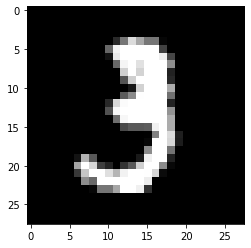

In [8]:
# example 1
image, label = dataset[0]
print('Label:', label)
plt.imshow(image, cmap='gray')

# example 2
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

PyTorch datasets allow us to specify one or more transformation functions that are applied to the images as they are loaded. The `torchvision.transforms` module contains many such predefined functions. We'll use the `ToTensor` transform to convert images into PyTorch tensors.

In [9]:
import torchvision.transforms as transforms
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


The image is now converted to a **1x28x28** tensor. 
- The first dimension tracks color channels. 
- The second and third dimensions represent pixels along the height and width of the image, respectively. 

Since images in the *MNIST dataset are grayscale, there's just one channel*. Other datasets have images with color, in which case there are t*hree channels: red, green, and blue (RGB)*.

Let's look at some sample values inside the tensor.

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


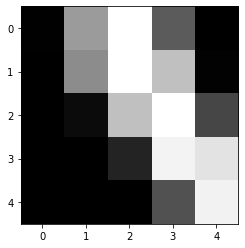

In [11]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

> **Note :** We need to pass just the 28x28 matrix to `plt.imshow`, without a channel dimension. We also pass a color map (`cmap=gray`) to indicate that we want to see a grayscale image.

## Training and Validation Datasets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
2. **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
3. **Test set** - used to compare different models or approaches and report the model's final accuracy.

In the MNIST dataset, there are 60,000 training images and 10,000 test images. The test set is standardized so that different researchers can report their models' results against the same collection of images. 

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the `random_spilt` method from PyTorch.

In [12]:
from torch.utils.data import random_split


train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

Without PyTorch the same stuff can also be done as:
- The random spilt is similar to generate a random set of numbers from 0-59,999 and then 
- According to our requirement now we can select the first say 50K data from train and rest 10K for validations

Functions used and there function :
- SubsetRandomSampler : Takes random subsets for the batches while creating training set
- DataLoader : The main creater of data set with all configurations

In [15]:
import numpy as np

# Here n = Total number of data elements and percent = Percent of data in valudation set
def split_indices(n, percent):
  
  # size of validation set
  n_val = int(n*percent)
  
  # Now create a random permuation from 0 to n-1
  idx = np.random.permutation(n)
  return idx[:n_val], idx[n_val:]

val_idx, train_idx = split_indices(len(dataset), 0.2)
print(len(val_idx), len(train_idx))

# Now finally defing the data loader as :
batch_size = 128

from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

# Making the training sample:
train_sampler = SubsetRandomSampler(train_idx)
train_loader_demo = DataLoader(train_ds, batch_size, sampler= train_sampler)

# Making the validation sample:
val_sampler = SubsetRandomSampler(val_idx)
val_loader_demo = DataLoader(train_ds, batch_size, sampler= val_sampler)

12000 48000


It's essential to choose a random sample for creating a validation set. Training data is often sorted by the target labels, i.e., images of 0s, followed by 1s, followed by 2s, etc. If we create a validation set using the *last 20% of images*, it would only consist of 8s and 9s. In contrast, the training set would contain no 8s or 9s. Such a training-validation would make it impossible to train a useful model.

We can now create data loaders to help us load the data in batches. We'll use a **batch size of 128.**

We set `shuffle=True` for the training data loader to ensure that the *batches generated in each epoch are different*. **This randomization helps generalize & speed up the training process. On the other hand, since the validation data loader is used only for evaluating the model, there is no need to shuffle the images.**

In [13]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Model

Now that we have prepared our data loaders, we can define our model.

* A **logistic regression** model is almost identical to a linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix operations (`pred = x @ w.t() + b`). 

* As we did with linear regression, we can use `nn.Linear` to create the model instead of manually creating and initializing the matrices.

* Since `nn.Linear` expects each training example to be a vector, each `1x28x28` image tensor is _flattened_ into a vector of size 784 `(28*28)` before being passed into the model.

* The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

- In the model you will see that the dimension of weight is `10*784` this is because for every class we have some specified weight value and we want to get the value w.r.t. each class and then get the max out of it, so each column of `784` weights corresponds to a particular class 

In [16]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

print(f"{model.weight.shape}\n{model.weight}\n {model.bias.shape}\n{model.bias}")

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0085, -0.0014,  0.0227,  ...,  0.0216, -0.0068,  0.0322],
        [-0.0295, -0.0160,  0.0048,  ...,  0.0103, -0.0327,  0.0264],
        [-0.0125,  0.0313,  0.0104,  ...,  0.0277, -0.0281,  0.0335],
        ...,
        [-0.0231, -0.0127, -0.0182,  ...,  0.0155, -0.0334, -0.0119],
        [-0.0284,  0.0009, -0.0243,  ..., -0.0200,  0.0145, -0.0001],
        [-0.0186, -0.0159,  0.0002,  ...,  0.0256, -0.0254, -0.0208]],
       requires_grad=True)
 torch.Size([10])
Parameter containing:
tensor([-0.0307,  0.0040,  0.0218,  0.0089,  0.0125,  0.0087, -0.0107, -0.0131,
        -0.0186, -0.0059], requires_grad=True)


Although there are a total of 7850 parameters here, conceptually, nothing has changed so far. Let's try and generate some outputs using our model. We'll take the first batch of 128 images from our dataset and pass them into our model. But before that we need to check there sizes and then place them accordingly

In [18]:
print(f"{images.shape}\n{images.reshape(128, 784).shape}")

torch.Size([128, 1, 28, 28])
torch.Size([128, 784])


Our images are of the shape 1x28x28, but we need them to be vectors of size 784, i.e., we need to flatten them. We'll use the `.reshape` method of a tensor, which will allow us to efficiently 'view' each image as a flat vector without really creating a copy of the underlying data. 

In [21]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images.reshape(128, 784))
    print(outputs.shape)
    break

tensor([1, 5, 1, 1, 3, 7, 2, 7, 3, 5, 2, 3, 8, 6, 2, 6, 1, 7, 7, 2, 3, 3, 7, 0,
        6, 5, 2, 9, 6, 1, 7, 6, 7, 5, 1, 5, 6, 8, 5, 4, 7, 3, 4, 1, 6, 8, 3, 9,
        8, 2, 7, 7, 7, 8, 7, 7, 7, 1, 2, 4, 2, 6, 8, 3, 2, 6, 6, 4, 2, 7, 1, 8,
        8, 0, 7, 4, 1, 0, 9, 9, 9, 3, 6, 4, 2, 9, 0, 6, 7, 5, 5, 4, 2, 5, 3, 6,
        7, 1, 8, 7, 8, 5, 9, 2, 9, 5, 8, 6, 9, 8, 7, 1, 1, 5, 3, 0, 4, 5, 2, 3,
        2, 7, 2, 9, 7, 5, 9, 1])
torch.Size([128, 1, 28, 28])
torch.Size([128, 10])


Keeping this point in the mind is often very difficult so to include this additional functionality within our model, we need to define a custom model by extending the `nn.Module` class from PyTorch. 

You can learn more about Python classes here: https://www.w3schools.com/python/python_classes.asp .

In [22]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

- Inside the `__init__` constructor method, we instantiate the weights and biases using `nn.Linear`. And inside the `forward` method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into `self.linear`.

- `xb.reshape(-1, 28*28)` indicates to PyTorch that we want a *view* of the `xb` tensor with two dimensions. The length along the 2nd dimension is 28\*28 (i.e., 784). One argument to `.reshape` can be set to `-1` (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

> **Note :** that the model no longer has `.weight` and `.bias` attributes (as they are now inside the `.linear` attribute), but it does have a `.parameters` method that returns a list containing the weights and bias.

In [23]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [25]:
# the model no longer has .weight and .bias attributes (as they are now inside the .linear attribute)
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0068, -0.0038, -0.0202,  ...,  0.0156, -0.0258,  0.0068],
         [-0.0357,  0.0263,  0.0059,  ..., -0.0019,  0.0213,  0.0088],
         [ 0.0082,  0.0190,  0.0119,  ...,  0.0121, -0.0277, -0.0073],
         ...,
         [-0.0151, -0.0120,  0.0026,  ...,  0.0264, -0.0304,  0.0223],
         [ 0.0185,  0.0343,  0.0021,  ...,  0.0282,  0.0145, -0.0274],
         [ 0.0196,  0.0115,  0.0342,  ...,  0.0329, -0.0334, -0.0082]],
        requires_grad=True), Parameter containing:
 tensor([ 2.9653e-02,  2.0777e-02, -1.6094e-02,  2.4442e-02,  3.1904e-02,
         -3.1533e-03, -3.0441e-05, -8.3500e-03,  2.8514e-02, -1.2060e-02],
        requires_grad=True)]

Now let's train the new model

In [28]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample output :\n', outputs[:1].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample output :
 tensor([[ 0.1995, -0.3655, -0.0331,  0.0279, -0.0441,  0.1402, -0.2405, -0.1939,
          0.1430, -0.1489]])


For each of the 100 input images, we get 10 outputs, one for each class. As discussed earlier, we'd like these outputs to represent probabilities. Each output row's elements must lie between 0 to 1 and add up to 1, which is not the case. 

To convert the output rows into probabilities, we use the softmax function, which has the following formula:

![softmax](https://i.imgur.com/EAh9jLN.png)

First, we replace each element `yi` in an output row by `e^yi`, making all the elements positive. 


Then, we divide them by their sum to ensure that they add up to 1. The resulting vector can thus be interpreted as probabilities.

The softmax function is included in the `torch.nn.functional` package and requires us to specify a dimension along which the function should be applied.

In [41]:
import torch.nn.functional as F

# Apply softmax for each output row
probs = F.softmax(outputs, dim=1) # dim = 1 means that we want softmax for the 2nd (0 based indexing hence 1 in code) of output ,i.e., consider 10 of [128,10]

# Look at sample probabilities
print("Sample probabilities:\n", probs[:1].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1266, 0.0719, 0.1003, 0.1066, 0.0992, 0.1193, 0.0815, 0.0854, 0.1196,
         0.0894]])
Sum:  1.0


Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using `torch.max`, which returns each row's largest element and the corresponding index.

In [42]:
max_probs, preds = torch.max(probs, dim=1)
# The predicted labels
print(preds)

# The probability corresponding to that label
print(max_probs)

# The original labels
labels

tensor([0, 3, 5, 8, 2, 8, 8, 2, 2, 2, 2, 2, 2, 2, 8, 8, 2, 8, 2, 3, 0, 0, 2, 0,
        8, 8, 3, 5, 8, 8, 2, 4, 2, 2, 5, 3, 2, 8, 2, 2, 4, 2, 4, 8, 8, 2, 2, 4,
        2, 8, 2, 8, 8, 8, 2, 2, 2, 2, 8, 4, 2, 8, 2, 8, 8, 8, 2, 2, 2, 2, 2, 2,
        2, 4, 5, 3, 8, 8, 4, 2, 2, 3, 2, 2, 2, 2, 8, 2, 3, 2, 8, 8, 2, 2, 2, 2,
        2, 2, 3, 2, 8, 4, 2, 8, 3, 2, 2, 2, 2, 2, 4, 3, 8, 8, 2, 2, 8, 2, 8, 0,
        2, 2, 7, 8, 2, 8, 2, 8])
tensor([0.1266, 0.1241, 0.1294, 0.1235, 0.1217, 0.1355, 0.1396, 0.1307, 0.1451,
        0.1245, 0.1197, 0.1367, 0.1349, 0.1236, 0.1498, 0.1475, 0.1524, 0.1447,
        0.1875, 0.1415, 0.1245, 0.1294, 0.1452, 0.1137, 0.1341, 0.1377, 0.1270,
        0.1231, 0.1289, 0.1211, 0.1265, 0.1418, 0.1230, 0.1260, 0.1212, 0.1395,
        0.1177, 0.1334, 0.1540, 0.1260, 0.1205, 0.1523, 0.1322, 0.1267, 0.1310,
        0.1456, 0.1441, 0.1170, 0.1426, 0.1533, 0.1354, 0.1232, 0.1296, 0.1341,
        0.1732, 0.1401, 0.1323, 0.1199, 0.1256, 0.1178, 0.1137, 0.1425, 0.1405,
       

tensor([0, 6, 8, 5, 4, 3, 8, 5, 1, 1, 1, 0, 8, 1, 8, 9, 8, 5, 2, 5, 7, 7, 1, 9,
        9, 0, 9, 6, 9, 8, 1, 6, 0, 8, 0, 2, 1, 0, 2, 5, 9, 8, 3, 9, 4, 1, 1, 9,
        3, 5, 4, 5, 4, 6, 2, 2, 5, 9, 4, 9, 6, 5, 2, 8, 5, 4, 7, 2, 1, 7, 5, 1,
        1, 9, 8, 6, 9, 8, 4, 1, 6, 6, 3, 2, 2, 2, 5, 7, 6, 9, 7, 5, 2, 3, 2, 2,
        7, 4, 4, 2, 6, 0, 1, 0, 6, 8, 5, 1, 7, 6, 9, 4, 8, 4, 3, 2, 7, 6, 7, 9,
        6, 5, 5, 9, 3, 8, 4, 7])

## Evaluation Metric and Loss Function

Lets first check the model accuracy

In [45]:
# if equal then it returns 1 else 0 
torch.sum(preds == labels)

# A more legible way to do the same is 
torch.sum(torch.eq(preds, labels))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1) # '-' to ignore the first retured value
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

accuracy(outputs, labels)

tensor(0.1797)

Accuracy is an excellent way for us (humans) to evaluate the model. However, we can't use it as a loss function for optimizing our model using gradient descent for the following reasons:

1. It's not a differentiable function. `torch.max` and `==` are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

2. It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements. 

For these reasons, accuracy is often used as an **evaluation metric** for classification, but not as a loss function. A commonly used loss function for classification problems is the **cross-entropy**, which has the following formula:

![cross-entropy](https://i.imgur.com/VDRDl1D.png)

While it looks complicated, it's actually quite simple:

* For each output row, pick the predicted probability for the correct label. E.g., if the predicted probabilities for an image are `[0.1, 0.3, 0.2, ...]` and the correct label is `1`, we pick the corresponding element `0.3` and ignore the rest.

* Then, take the [logarithm](https://en.wikipedia.org/wiki/Logarithm) of the picked probability. If the probability is high, i.e., close to 1, then its logarithm is a very small negative value, close to 0. And if the probability is low (close to 0), then the logarithm is a very large negative value. We also multiply the result by -1, which results is a large postive value of the loss for poor predictions.

![](https://www.intmath.com/blog/wp-content/images/2019/05/log10.png)

* Finally, take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.

Unlike accuracy, cross-entropy is a continuous and differentiable function. It also provides useful feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). These two factors make cross-entropy a better choice for the loss function.

As you might expect, PyTorch provides an efficient and tensor-friendly implementation of cross-entropy as part of the `torch.nn.functional` package. Moreover, it also performs softmax internally, so we can directly pass in the model's outputs without converting them into probabilities.

In [46]:
import torch.nn.functional as F

loss_fn = F.cross_entropy

# Loss for first batch is 
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2947, grad_fn=<NllLossBackward>)


We know that cross-entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples. Therefore, one way to interpret the resulting number e.g. `2.23` is look at `e^-2.23` which is around `0.1` as the predicted probability of the correct label, on average. *The lower the loss, The better the model.*

## Training the model

Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here's what it looks like in pseudocode:

```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```

Some parts of the training loop are specific the specific problem we're solving (e.g. loss function, metrics etc.) whereas others are generic and can be applied to any deep learning problem. 

We'll include the problem-independent parts within a function called `fit`, which will be used to train the model. The problem-specific parts will be implemented by adding new methods to the `nn.Module` class.


In [47]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

The `fit` function records the validation loss and metric from each epoch. It returns a history of the training, useful for debugging & visualization.

Configurations like batch size, learning rate, etc. (called hyperparameters), need to picked in advance while training machine learning models. Choosing the right hyperparameters is critical for training a reasonably accurate model within a reasonable amount of time. It is an active area of research and experimentation in machine learning. Feel free to try different learning rates and see how it affects the training process.


Let's define the `evaluate` function, used in the validation phase of `fit`.

In [48]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

Now, let's finalise the overall model to include additional methods `training_step`, `validation_step`, `validation_epoch_end`, and `epoch_end` used by `fit` and `evaluate`.

In [49]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

Before we train the model, let's see how the model performs on the validation set with the initial set of randomly initialized weights & biases.


In [50]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.08751977980136871, 'val_loss': 2.3351924419403076}

In [51]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9612, val_acc: 0.5844
Epoch [1], val_loss: 1.6920, val_acc: 0.7167
Epoch [2], val_loss: 1.4906, val_acc: 0.7596
Epoch [3], val_loss: 1.3380, val_acc: 0.7816
Epoch [4], val_loss: 1.2204, val_acc: 0.7974


In [52]:
history2 = fit(15, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1278, val_acc: 0.8066
Epoch [1], val_loss: 1.0535, val_acc: 0.8153
Epoch [2], val_loss: 0.9927, val_acc: 0.8208
Epoch [3], val_loss: 0.9420, val_acc: 0.8258
Epoch [4], val_loss: 0.8993, val_acc: 0.8290
Epoch [5], val_loss: 0.8627, val_acc: 0.8320
Epoch [6], val_loss: 0.8309, val_acc: 0.8357
Epoch [7], val_loss: 0.8031, val_acc: 0.8386
Epoch [8], val_loss: 0.7786, val_acc: 0.8416
Epoch [9], val_loss: 0.7568, val_acc: 0.8430
Epoch [10], val_loss: 0.7372, val_acc: 0.8454
Epoch [11], val_loss: 0.7195, val_acc: 0.8472
Epoch [12], val_loss: 0.7035, val_acc: 0.8486
Epoch [13], val_loss: 0.6889, val_acc: 0.8514
Epoch [14], val_loss: 0.6756, val_acc: 0.8522


While the accuracy does continue to increase as we train for more epochs, the improvements get smaller with every epoch. Let's visualize this using a line graph.

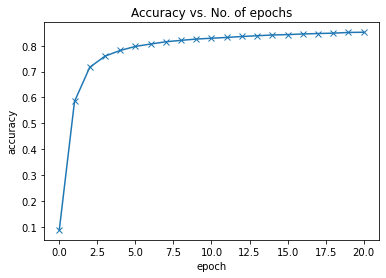

In [53]:
history = [result0] + history1 + history2
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

It's quite clear from the above picture that the model probably won't cross the accuracy threshold of 90% even after training for a very long time. One possible reason for this is that the **learning rate might be too high**. The model's parameters may be "bouncing" around the optimal set of parameters for the lowest loss. You can try reducing the learning rate and training for a few more epochs to see if it helps.

The more likely reason that the model just isn't powerful enough. If you remember our initial hypothesis, we have assumed that the output (in this case the class probabilities) is a linear function of the input (pixel intensities), obtained by perfoming a matrix multiplication with the weights matrix and adding the bias. This is a fairly weak assumption, as there may not actually exist a linear relationship between the pixel intensities in an image and the digit it represents. While it works reasonably well for a simple dataset like MNIST (getting us to 85% accuracy), we need more sophisticated models that can capture non-linear relationships between image pixels and labels for complex tasks like recognizing everyday objects, animals etc.

## Testing with individual images
While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by recreating the test dataset with the `ToTensor` transform.

In [54]:
# Define test dataset
test_dataset = MNIST(root='data/',train=False,transform=transforms.ToTensor())

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [55]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

`img.unsqueeze` simply adds another dimension at the begining of the 1x28x28 tensor, making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.

Let's try it out with a few images.

Label: 9 , Predicted: 9


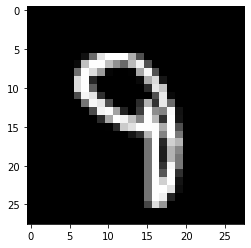

In [56]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


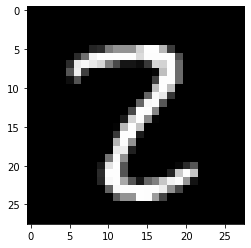

In [57]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [58]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.8612304925918579, 'val_loss': 0.6421452164649963}

## Saving and loading the model

Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights and bias matrices to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [62]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

# To see current values of weights and stuff
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-1.8055e-02, -2.4366e-02,  8.4072e-03,  ..., -1.0110e-02,
                        9.3009e-03,  6.1279e-03],
                      [ 3.3557e-02, -1.2383e-03,  2.1201e-02,  ...,  1.1122e-02,
                        2.0882e-02, -5.9221e-06],
                      [-2.6034e-02, -3.5465e-02, -3.5609e-02,  ...,  1.6568e-02,
                        8.2129e-03, -3.0926e-02],
                      ...,
                      [ 1.2909e-02, -2.2729e-02, -2.4095e-02,  ...,  7.3710e-03,
                       -7.0508e-03, -9.2840e-03],
                      [-2.4739e-02, -2.7053e-02, -6.7562e-03,  ...,  1.2738e-02,
                        1.4302e-02, -2.8188e-02],
                      [-2.9648e-02, -6.8221e-03,  1.0674e-03,  ..., -2.2810e-03,
                       -2.7620e-02, -2.9915e-03]])),
             ('linear.bias',
              tensor([-0.0703,  0.0698, -0.0421, -0.0260,  0.0259,  0.0353, -0.0427,  0.0266,
                      -0.1171,

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model.

To load the model weights, we can instante a new object of the class `MnistModel`, and use the `.load_state_dict` method.

In [64]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict() # same as previous since loaded that file

OrderedDict([('linear.weight',
              tensor([[-1.8055e-02, -2.4366e-02,  8.4072e-03,  ..., -1.0110e-02,
                        9.3009e-03,  6.1279e-03],
                      [ 3.3557e-02, -1.2383e-03,  2.1201e-02,  ...,  1.1122e-02,
                        2.0882e-02, -5.9221e-06],
                      [-2.6034e-02, -3.5465e-02, -3.5609e-02,  ...,  1.6568e-02,
                        8.2129e-03, -3.0926e-02],
                      ...,
                      [ 1.2909e-02, -2.2729e-02, -2.4095e-02,  ...,  7.3710e-03,
                       -7.0508e-03, -9.2840e-03],
                      [-2.4739e-02, -2.7053e-02, -6.7562e-03,  ...,  1.2738e-02,
                        1.4302e-02, -2.8188e-02],
                      [-2.9648e-02, -6.8221e-03,  1.0674e-03,  ..., -2.2810e-03,
                       -2.7620e-02, -2.9915e-03]])),
             ('linear.bias',
              tensor([-0.0703,  0.0698, -0.0421, -0.0260,  0.0259,  0.0353, -0.0427,  0.0266,
                      -0.1171,

## Summary and Further Reading

We've created a fairly sophisticated training and evaluation pipeline in this tutorial. Here's a list of the topics we've covered:

* Working with images in PyTorch (using the MNIST dataset)
* Splitting a dataset into training, validation and test sets
* Creating PyTorch models with custom logic by extending the `nn.Module` class
* Interpreting model ouputs as probabilities using softmax, and picking predicted labels
* Picking a good evaluation metric (accuracy) and loss function (cross entropy) for classification problems
* Setting up a training loop that also evaluates the model using the validation set
* Testing the model manually on randomly picked examples 
* Saving and loading model checkpoints to avoid retraining from scratch

There's a lot of scope to experiment here, and I encourage you to use the interactive nature of Jupyter to play around with the various parameters. Here are a few ideas:

* Try making the validation set smaller or larger, and see how it affects the model.
* Try changing the learning rate and see if you can achieve the same accuracy in fewer epochs.
* Try changing the batch size. What happens if you use too high a batch size, or too low?
* Modify the `fit` function to also track the overall loss and accuracy on the training set, and see how it compares with the validation loss/accuracy. Can you explain why it's lower/higher?
* Train with a small subset of the data, and see if you can reach a similar level of accuracy.
* Try building a model for a different dataset, such as the [CIFAR10 or CIFAR100 datasets](https://www.cs.toronto.edu/~kriz/cifar.html).

Here are some references for further reading:
* For a more mathematical treatment, see the popular [Machine Learning](https://www.coursera.org/lecture/machine-learning/classification-wlPeP) course on Coursera. Most of the images used in this tutorial series have been taken from this course.
* The training loop defined in this notebook was inspired from [FastAI development notebooks](https://github.com/fastai/fastai_docs/blob/master/dev_nb/001a_nn_basics.ipynb) which contain a wealth of other useful stuff if you can read and understand the code.
* For a deep dive into softmax and cross entropy, see [this blog post on DeepNotes](https://deepnotes.io/softmax-crossentropy).


With this we complete our discussion of logistic regression, and we're ready to move on to the next topic: [Training Deep Neural Networks on a GPU](https://jovian.ai/aakashns/04-feedforward-nn)!